In [1]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

ModuleNotFoundError: No module named 'imageio'

In [2]:
pip install imageio

     ---------------------------------------- 3.4/3.4 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

DriverError: maps/cb_2018_us_state_20m.shp: No such file or directory

In [4]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

DriverError: Unable to open maps/cb_2018_us_state_20m.shx or maps/cb_2018_us_state_20m.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

In [5]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


In [6]:
state_pop = pd.read_csv("data/nst-est2018-alldata.csv")
state_pop.head()


NameError: name 'pd' is not defined

In [7]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [8]:
state_pop = pd.read_csv("data/nst-est2018-alldata.csv")
state_pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,DEATHS2017,DEATHS2018,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,NATURALINC2017,NATURALINC2018,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,INTERNATIONALMIG2017,INTERNATIONALMIG2018,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,DOMESTICMIG2017,DOMESTICMIG2018,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,NETMIG2017,NETMIG2018,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016,RESIDUAL2017,RESIDUAL2018,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RBIRTH2017,RBIRTH2018,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RDEATH2018,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,10,0,0,0,United States,308745538,308758105,309326085,311580009,313874218,316057727,318386421,320742673,323071342,325147121,327167434,567980,2253924,2294209,2183509,2328694,2356252,2328669,2075779,2020313,987836,3973485,3936976,3940576,3963195,3992376,3962654,3901982,3855500,598691,2512442,2501531,2608019,2582448,2699826,2703215,2779436,2814013,389145,1461043,1435445,1332557,1380747,1292550,1259439,1122546,1041487,178835,792881,858764,850952,947947,1063702,1069230,953233,978826,0,0,0,0,0,0,0,0,0,178835,792881,858764,850952,947947,1063702,1069230,953233,978826,0,0,0,0,0,0,0,0,0,12.798989,12.589174,12.511117,12.493440,12.493176,12.309934,12.039096,11.820984,8.092824,7.999086,8.280320,8.140821,8.448453,8.397503,8.575615,8.627779,4.706164,4.590088,4.230797,4.352620,4.044723,3.912431,3.463480,3.193205,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.553948,2.746049,2.701727,2.988276,3.328598,3.321549,2.941086,3.001086
1,20,1,0,0,Northeast Region,55317240,55318430,55380645,55600532,55776729,55907823,56015864,56047587,56058789,56072676,56111079,62215,219887,176197,131094,108041,31723,11202,13887,38403,163454,646265,637904,635741,632433,634515,628039,616552,609336,110848,470816,460985,480032,470196,488881,480331,501022,506909,52606,175449,176919,155709,162237,145634,147708,115530,102427,45723,206686,207584,194103,222685,227275,236718,215872,229700,-32918,-159789,-205314,-216273,-274391,-339996,-372953,-316879,-292928,12805,46897,2270,-22170,-51706,-112721,-136235,-101007,-63228,-3196,-2459,-2992,-2445,-2490,-1190,-271,-636,-796,11.646389,11.454834,11.384583,11.301147,11.324210,11.204340,10.996949,10.863177,8.484610,8.277902,8.596211,8.402082,8.725075,8.569200,8.936332,9.037120,3.161779,3.176932,2.788371,2.899065,2.599135,2.635140,2.060617,1.826058,3.724704,3.727583,3.475915,3.979229,4.056184,4.223096,3.850338,4.095067,-2.879569,-3.686821,-3.872926,-4.903180,-6.067920,-6.653556,-5.651919,-5.222289,0.845134,0.040762,-0.397011,-0.923951,-2.011735,-2.430459,

In [9]:
pop_states = usa.merge(state_pop, left_on="NAME",
right_on="NAME")
pop_states.head()

SyntaxError: invalid syntax (1398079468.py, line 3)

In [10]:
pop_states = usa.merge(state_pop, left_on="NAME",
right_on="NAME")
pop_states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,SUMLEV,REGION,DIVISION,STATE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015,DEATHS2016,DEATHS2017,DEATHS2018,NATURALINC2010,NATURALINC2011,NATURALINC2012,NATURALINC2013,NATURALINC2014,NATURALINC2015,NATURALINC2016,NATURALINC2017,NATURALINC2018,INTERNATIONALMIG2010,INTERNATIONALMIG2011,INTERNATIONALMIG2012,INTERNATIONALMIG2013,INTERNATIONALMIG2014,INTERNATIONALMIG2015,INTERNATIONALMIG2016,INTERNATIONALMIG2017,INTERNATIONALMIG2018,DOMESTICMIG2010,DOMESTICMIG2011,DOMESTICMIG2012,DOMESTICMIG2013,DOMESTICMIG2014,DOMESTICMIG2015,DOMESTICMIG2016,DOMESTICMIG2017,DOMESTICMIG2018,NETMIG2010,NETMIG2011,NETMIG2012,NETMIG2013,NETMIG2014,NETMIG2015,NETMIG2016,NETMIG2017,NETMIG2018,RESIDUAL2010,RESIDUAL2011,RESIDUAL2012,RESIDUAL2013,RESIDUAL2014,RESIDUAL2015,RESIDUAL2016,RESIDUAL2017,RESIDUAL2018,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RBIRTH2016,RBIRTH2017,RBIRTH2018,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015,RDEATH2016,RDEATH2017,RDEATH2018,RNATURALINC2011,RNATURALINC2012,RNATURALINC2013,RNATURALINC2014,RNATURALINC2015,RNATURALINC2016,RNATURALINC2017,RNATURALINC2018,RINTERNATIONALMIG2011,RINTERNATIONALMIG2012,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RINTERNATIONALMIG2015,RINTERNATIONALMIG2016,RINTERNATIONALMIG2017,RINTERNATIONALMIG2018,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RDOMESTICMIG2018,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",40,3,5,24,5773552,5773798,5788642,5838991,5887072,5923704,5958165,5986717,6004692,6024891,6042718,14844,50349,48081,36632,34461,28552,17975,20199,17827,18454,73542,72720,72362,72756,74158,73387,72138,71029,10628,43674,43461,45736,44735,47160,47239,50555,51184,7826,29868,29259,26626,28021,26998,26148,21583,19845,6590,20726,25760,21406,23397,27566,21569,22756,22575,841,208,-6323,-10919,-16504,-25680,-29676,-24011,-24518,7431,20934,19437,10487,6893,1886,-8107,-1255,-1943,-413,-453,-615,-481,-453,-332,-66,-129,-75,12.649522,12.403140,12.253556,12.246558,12.416699,12.239929,11.993433,11.771843,7.512105,7.412718,7.744792,7.529960,7.896269,7.878807,8.405113,8.482873,5.137417,4.990422,4.508764,4.716598,4.520430,4.361122,3.588321,3.288970,3.564956,4.393632,3.624825,3.938269,4.615533,3.597409,3.783340,3.741421,0.035777,-1.078452,-1.848989,-2.778014,-4.299749,-4.949543,-3.991992,-4.063440,3.600733,3.315179,1.775836,1.160255,0.315784,-1.352135,-0.208652,-0.322019
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",40,2,4,19,3046355,3046872,3050767,3066054,3076097,3093078,3109504,3121460,3131785,3143637,3156145,3895,15287,10043,16981,16426,11956,10325,11852,12508,9966,37852,38478,38805,39460,39694,39428,38892,38417,6871,28210,28048,29139,28925,29808,29189,28817,28803,3095,9642,10430,9666,10535,9886,10239,10075,9614,1454,6180,4068,6973,6862,5492,5622,5809,5828,-553,-541,-4438,306,-891,-3304,-5508,-4010,-2886,901,5639,-370,7279,5971,2188,114,1799,2942,-101,6,-17,36,-80,-118,-28,-22,-48,12.376363,12.529161,12.580288,12.723733,12.740886,12.610413,12.395023,12.196295,9.223745,9.132957,9.446644,9.326761,9.567701,9.335633,9.184084,9.144126,3.152618,3.396204,3.133644,3.396972,3.173185,3.274780,3.210939,3.052169,2.020657,1.324617,2.260594,2.212627,1.762809,1.798106,1.851350,1.850223,-0.176889,-1.445096,0.099203,-0.287300

In [11]:
pop_states[pop_states.NAME=="California"].plot()

SyntaxError: invalid syntax (3189025507.py, line 1)

<AxesSubplot:>

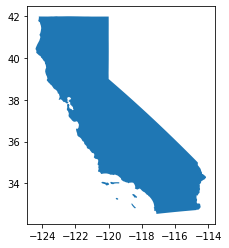

In [12]:
pop_states[pop_states.NAME=="California"].plot()

In [13]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


<AxesSubplot:>

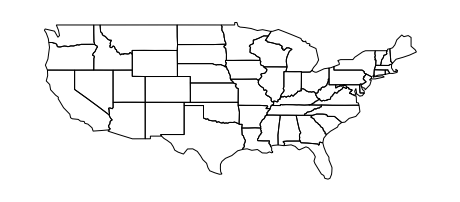

In [14]:
gplt.polyplot(contiguous_usa)


In [15]:
path = gplt.datasets.get_path("usa_cities")
usa_cities = gpd.read_file(path)
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [16]:
continental_usa_cities = usa_cities.query('STATE not in ["HI",
"AK", "PR"]')
gplt.pointplot(continental_usa_cities)

SyntaxError: unterminated string literal (detected at line 1) (2700694207.py, line 1)

<AxesSubplot:>

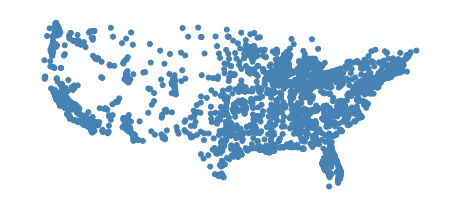

In [17]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

<AxesSubplot:>

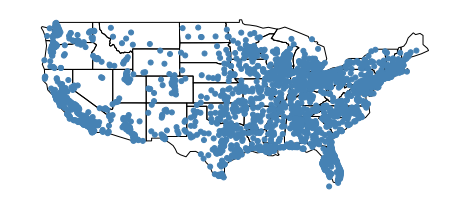

In [18]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

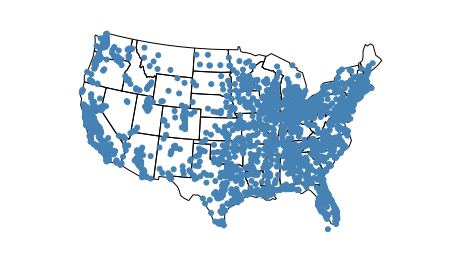

In [19]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

<GeoAxesSubplot:>

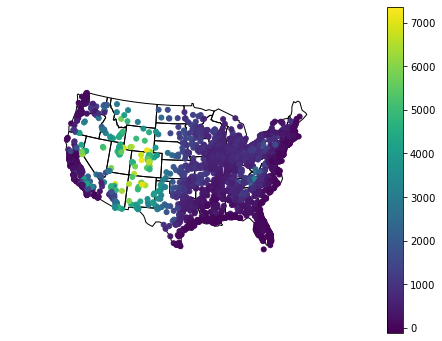

In [20]:
ax = gplt.polyplot(contiguous_usa,projection=gcrs.AlbersEqualArea())

gplt.pointplot(
 continental_usa_cities,
 ax=ax,
 hue="ELEV_IN_FT",
 legend=True
)

Text(0.5, 1.0, 'Cities in the continental US, by elevation')

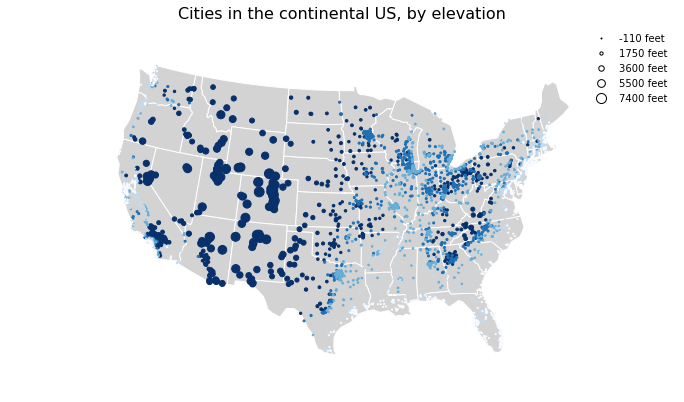

In [21]:
ax = gplt.polyplot(
 contiguous_usa,
 edgecolor="white",
 facecolor="lightgray",
 figsize=(12, 8),
 projection=gcrs.AlbersEqualArea()
)

gplt.pointplot(
 continental_usa_cities,
 ax=ax,
 hue="ELEV_IN_FT",
 cmap="Blues",
 scheme="quantiles",
 scale="ELEV_IN_FT",
 limits=(1, 10),
 legend=True,
 legend_var="scale",
 legend_kwargs={"frameon": False},
 legend_values=[-110, 1750, 3600, 5500, 7400],
 legend_labels=["-110 feet", "1750 feet", "3600 feet", "5500 feet", "7400 feet"]
)

ax.set_title("Cities in the continental US, by elevation", fontsize=16)

<GeoAxesSubplot:>

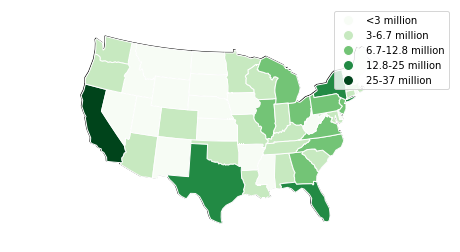

In [22]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.choropleth(
 contiguous_usa,
 hue="population",
 edgecolor="white",
 linewidth=1,
 cmap="Greens",
 legend=True,
 scheme="FisherJenks",
 legend_labels=[
     "<3 million", "3-6.7 million", "6.7-12.8 million",
     "12.8-25 million", "25-37 million"
 ],
 projection=gcrs.AlbersEqualArea(),
 ax=ax
)

<GeoAxesSubplot:>

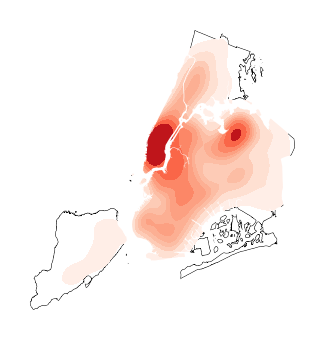

In [23]:
boroughs = gpd.read_file(gplt.datasets.get_path("nyc_boroughs"))
collisions = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))
ax = gplt.polyplot(boroughs, projection=gcrs.AlbersEqualArea())
gplt.kdeplot(collisions, cmap="Reds", shade=True, clip=boroughs, ax=ax)

<GeoAxesSubplot:>

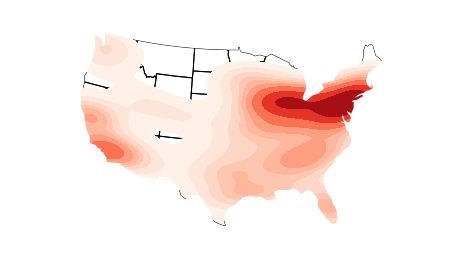

In [24]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())

gplt.kdeplot(
 continental_usa_cities,
 cmap="Reds",
 shade=True,
 clip=contiguous_usa,
 ax=ax
)

In [25]:
obesity = pd.read_csv(gplt.datasets.get_path("obesity_by_state"), sep="\t")
obesity.head()

,State,Percent
0,Alabama,32.4
1,Missouri,30.4
2,Alaska,28.4
3,Montana,24.6
4,Arizona,26.8


In [26]:
geo_obesity = contiguous_usa.set_index("state").join(obesity.set_index("State"))
geo_obesity.head()

,adm1_code,population,geometry,Percent
state,,,,
Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",25.5
Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",24.6
North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",31.0
Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",29.6
Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",27.2


<GeoAxesSubplot:>

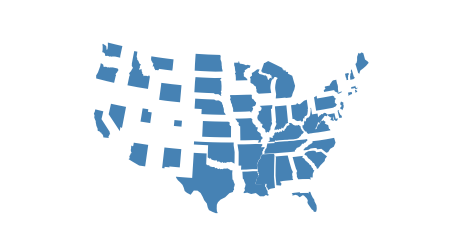

In [27]:
gplt.cartogram(
 geo_obesity,
 scale="Percent",
 projection=gcrs.AlbersEqualArea()
)

In [28]:
scheme = mc.Quantiles(continental_usa_cities["ELEV_IN_FT"], k=10)
scheme

Quantiles                 

     Interval        Count
--------------------------
[-112.00,   26.00] |   382
(  26.00,   72.00] |   351
(  72.00,  157.00] |   362
( 157.00,  328.00] |   353
( 328.00,  528.00] |   366
( 528.00,  646.00] |   359
( 646.00,  778.00] |   359
( 778.00,  948.00] |   363
( 948.00, 1310.50] |   359
(1310.50, 7369.00] |   362

<GeoAxesSubplot:>

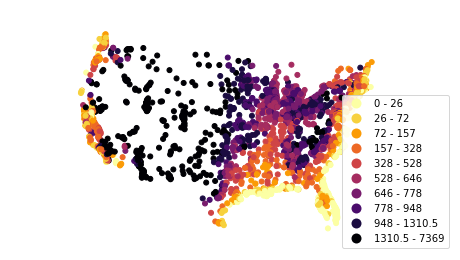

In [29]:
gplt.pointplot(
 continental_usa_cities,
 projection=gcrs.AlbersEqualArea(),
 hue="ELEV_IN_FT",
 scheme=scheme,
 cmap="inferno_r",
 legend=True
)

Text(0.5, 1.0, 'Primary Schools in Greater Melbourne, 2018')

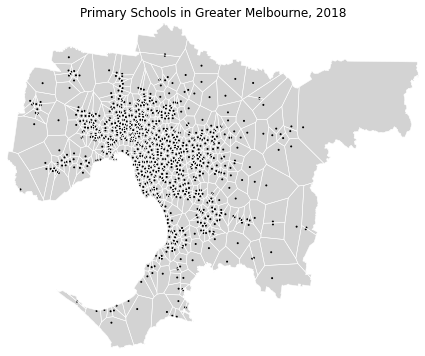

In [30]:
import warnings
warnings.filterwarnings("ignore", "GeoSeries.isna", UserWarning)
melbourne = gpd.read_file(gplt.datasets.get_path("melbourne"))
df = gpd.read_file(gplt.datasets.get_path("melbourne_schools"))
melbourne_primary_schools = df.query('School_Type == "Primary"')

ax = gplt.voronoi(
 melbourne_primary_schools,
 clip=melbourne,
 linewidth=0.5,
 edgecolor="white",
 projection=gcrs.Mercator()
)

gplt.polyplot(
 melbourne,
 edgecolor="None",
 facecolor="lightgray",
 ax=ax
)

gplt.pointplot(
 melbourne_primary_schools,
 color="black",
 ax=ax,
 s=1,
 extent=melbourne.total_bounds
)

plt.title("Primary Schools in Greater Melbourne, 2018")

<GeoAxesSubplot:>

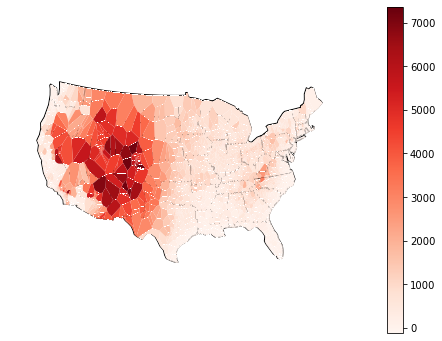

In [31]:
proj = gplt.crs.AlbersEqualArea(
 central_longitude=-98,
 central_latitude=39.5
)

ax = gplt.voronoi(
 continental_usa_cities,
 hue="ELEV_IN_FT",
 clip=contiguous_usa,
 projection=proj,
 cmap="Reds",
 legend=True,
 edgecolor="white",
 linewidth=0.01
)

gplt.polyplot(
 contiguous_usa,
 ax=ax,
 extent=contiguous_usa.total_bounds,
 edgecolor="black",
 linewidth=1,
 zorder=1
)

In [32]:
ihme = pd.read_csv("data/Hospitalization_all_locs.csv")
ihme.head()

,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
0,19692,Abruzzo,2020-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19693,Abruzzo,2020-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19694,Abruzzo,2020-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19695,Abruzzo,2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19696,Abruzzo,2020-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
is_earthday = ihme["date"]=="2020-04-22"
is_earthday.head()

0    False
1    False
2    False
3    False
4    False
Name: date, dtype: bool

In [34]:
cv19 = contiguous_usa.merge(ihme[is_earthday], left_on="state", right_on="location_name")
cv19.head()

,state,adm1_code,population,geometry,V1,location_name,date,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,InvVen_upper,deaths_mean,deaths_lower,deaths_upper,admis_mean,admis_lower,admis_upper,newICU_mean,newICU_lower,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper,mobility_data_type,mobility_composite,total_tests_data_type,total_tests,confirmed_infections,est_infections_mean,est_infections_lower,est_infections_upper
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",11447,Minnesota,2020-04-22,493.162990,455.458929,529.384375,145.741320,141.332500,150.205714,136.500318,133.354464,140.250000,17.0,17.0,17.0,76.431872,61.924107,91.942647,24.377799,23.000000,26.067500,180.000,180.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,observed,-48.426846,observed,1618.603622,170.095721,4794.056933,1905.129415,13245.491836
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",12056,Montana,2020-04-22,17.030100,14.048750,20.700000,5.292850,4.550000,6.101250,4.684750,4.100000,5.400000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.286000,0.050000,0.600000,11.000,11.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,observed,-36.893179,observed,264.515854,2.882530,19.781349,9.904035,31.692349
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",13680,North Dakota,2020-04-22,24.143100,19.650000,29.402500,7.247750,6.750000,7.850000,6.814400,6.400000,7.300000,1.0,1.0,1.0,3.444850,2.000000,5.800000,1.155900,1.000000,1.400000,12.000,12.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,observed,-34.676742,observed,746.879357,44.152824,97.421718,42.711405,260.897494
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",9214,Idaho,2020-04-22,57.453950,51.097500,64.250000,18.571450,17.000000,20.250000,16.076200,14.850000,17.500000,2.0,2.0,2.0,4.525300,3.100000,6.751250,1.613950,1.250000,2.050000,53.000,53.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,observed,-36.296024,observed,289.599295,35.493333,93.011898,64.315860,135.663456
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",16319,Washington,2020-04-22,603.881368,580.271528,627.589861,175.195486,170.660972,180.125556,155.399446,151.444167,159.490417,17.0,17.0,17.0,73.325291,65.348889,81.872778,21.350566,20.144444,22.600556,696.001,696.0,696.0,0.0,0.0,0.0,0.0,0.0,0.0,observed,-51.945531,observed,2404.474124,210.639517,1443.066996,1200.791132,1855.853868


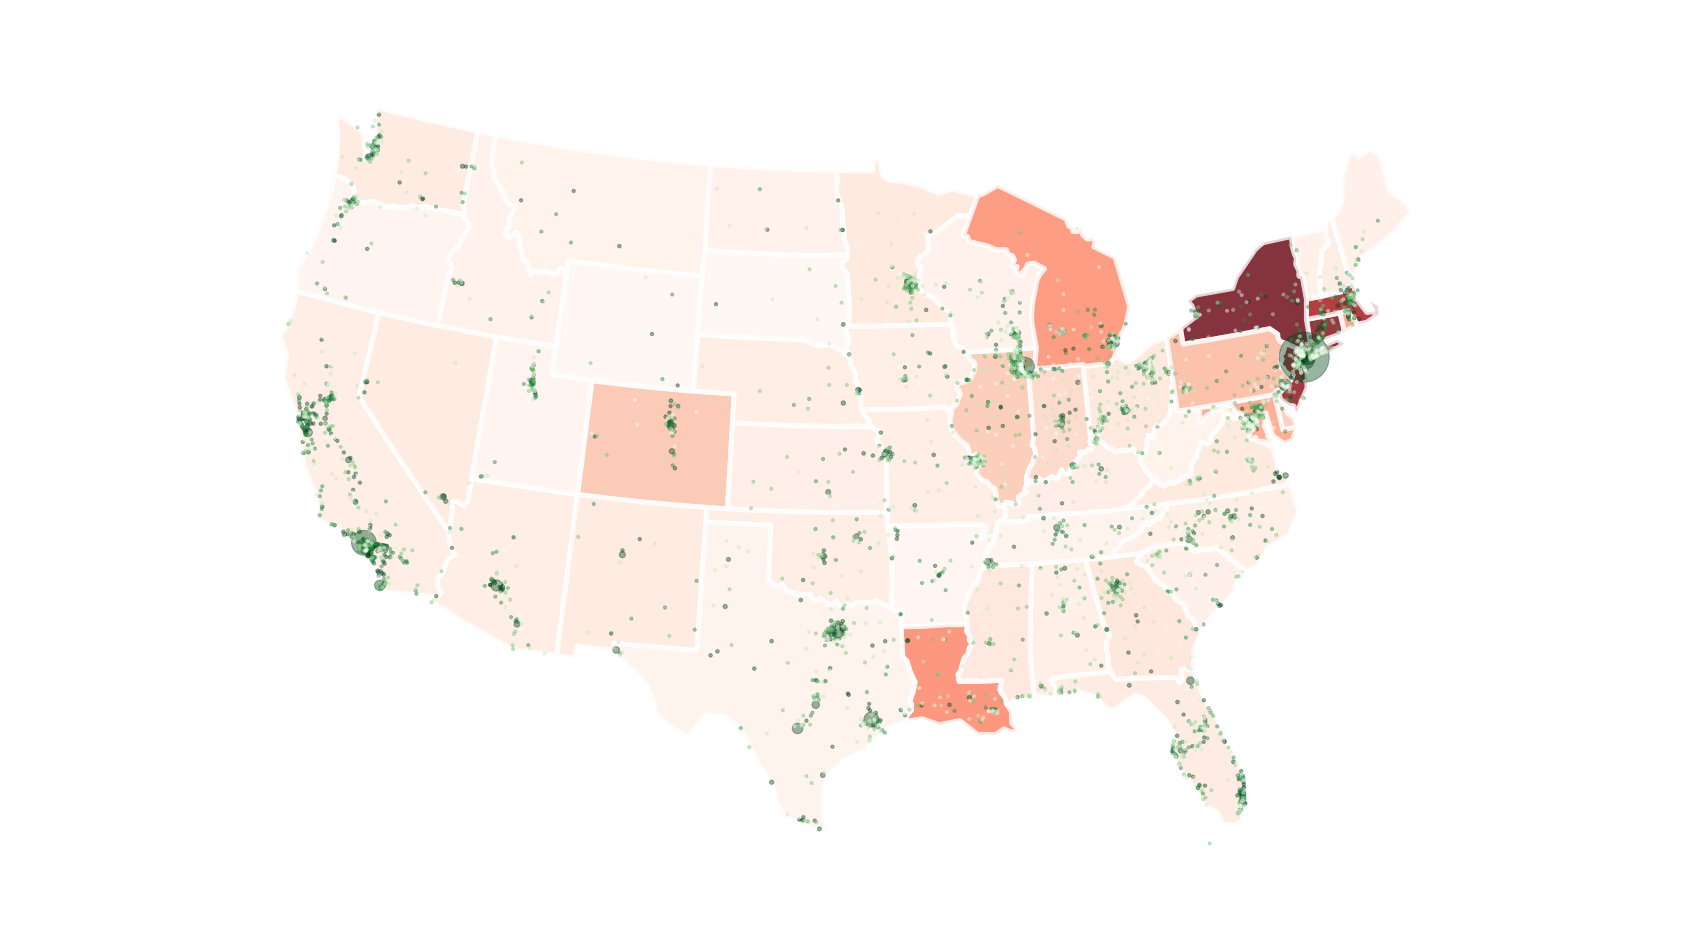

In [35]:
deaths_per_mil = cv19["deaths_mean"] / cv19["population"] * 1000000.0
cv19["deaths_per_mil"] = deaths_per_mil

ax = gplt.choropleth(
 cv19,
 hue="deaths_per_mil",
 edgecolor="white",
 linewidth=5,
 cmap="Reds",
 alpha=0.8,
 projection=gcrs.AlbersEqualArea(),
 figsize=(30, 30)
)


ax = gplt.pointplot(
 continental_usa_cities,
 hue="POP_2010",
 cmap="Greens",
 scheme="quantiles",
 scale="POP_2010",
 limits=(3, 50),
 zorder=2,
 alpha=0.4,
 ax=ax
)

In [37]:
def plot_choropleth (anim_path, date, cv19, cities):
    
ax = gplt.choropleth(
 cv19,
 hue="deaths_per_mil",
 edgecolor="white",
 linewidth=5,
 cmap="Reds",
 alpha = 0.8,
 projection=gcrs.AlbersEqualArea(),
 figsize=(30, 30)
 )


ax = gplt.pointplot(
 cities,
 hue="POP_2010",
 cmap="Greens",
 scheme="quantiles",
 scale="POP_2010",
 limits=(3, 50),
 zorder=2,
 alpha = 0.4,
 ax=ax
 )

 ax.set_title(
 f"COVID-19 deaths/million vs. population on {date}",
 fontsize=36
 )
    
 file_name = str(anim_path / "{}.png".format(date.replace("-", "")))
 plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
 return file_name

IndentationError: expected an indented block after function definition on line 1 (4210838088.py, line 2)

In [38]:
def plot_choropleth (anim_path, date, cv19, cities):
    
ax = gplt.choropleth(
 cv19,
 hue="deaths_per_mil",
 edgecolor="white",
 linewidth=5,
 cmap="Reds",
 alpha = 0.8,
 projection=gcrs.AlbersEqualArea(),
 figsize=(30, 30)
 )


ax = gplt.pointplot(
 cities,
 hue="POP_2010",
 cmap="Greens",
 scheme="quantiles",
 scale="POP_2010",
 limits=(3, 50),
 zorder=2,
 alpha = 0.4,
 ax=ax
 )

 ax.set_title(
 f"COVID-19 deaths/million vs. population on {date}",
 fontsize=36
 )
    
 file_name = str(anim_path / "{}.png".format(date.replace("-", "")))
 plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
 return file_name

IndentationError: expected an indented block after function definition on line 1 (4211143093.py, line 3)

In [42]:
def plot_choropleth (anim_path, date, cv19, cities): ax = gplt.choropleth(
 cv19,
 hue="deaths_per_mil",
 edgecolor="white",
 linewidth=5,
 cmap="Reds",
 alpha = 0.8,
 projection=gcrs.AlbersEqualArea(),
 figsize=(30, 30)
 )


ax = gplt.pointplot(
 cities,
 hue="POP_2010",
 cmap="Greens",
 scheme="quantiles",
 scale="POP_2010",
 limits=(3, 50),
 zorder=2,
 alpha = 0.4,
 ax=ax
 )

ax.set_title(f"COVID-19 deaths/million vs. population on {date}", fontsize=36)
    
file_name = str(anim_path / "{}.png".format(date.replace("-", "")))
plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
return file_name

NameError: name 'cities' is not defined

In [43]:
def plot_choropleth (anim_path, date, cv19, cities):
ax = gplt.choropleth(
    cv19,
    hue="deaths_per_mil",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha=0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
  )
  
ax = gplt.pointplot(
    cities,
    hue="POP_2010",
    cmap="Greens",
    scheme="quantiles",
    scale="POP_2010",
    limits=(3, 50),
    zorder=2,
    alpha=0.4,
    ax=ax
  )
  
ax.set_title(
    f"COVID-19 deaths/million vs. population on {date}",
    fontsize=36
  )
  
file_name = str(anim_path / "{}.png".format(date.replace("-", "")))
plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
  
return file_name

IndentationError: expected an indented block after function definition on line 1 (2637877574.py, line 2)

In [44]:
def plot_choropleth (anim_path, date, cv19, cities):
  ax = gplt.choropleth(
    cv19,
    hue="deaths_per_mil",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha=0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
  )
  
  ax = gplt.pointplot(
    cities,
    hue="POP_2010",
    cmap="Greens",
    scheme="quantiles",
    scale="POP_2010",
    limits=(3, 50),
    zorder=2,
    alpha=0.4,
    ax=ax
  )
  
  ax.set_title(
    f"COVID-19 deaths/million vs. population on {date}",
    fontsize=36
  )
  
  file_name = str(anim_path / "{}.png".format(date.replace("-", "")))
  plt.savefig(file_name, bbox_inches="tight", pad_inches=0.1)
  
  return file_name

In [45]:
date_set = set([])

for d in ihme["date"].tolist():
  if d >= "2020–03–23" and d <= "2020–04–01":
    date_set.add(d)

dates = sorted(list(date_set))

In [50]:
anim_path = pathlib.Path("anim/")
anim_path.mkdir(parents=True, exist_ok=True)

fig = plt.figure()
image_files = []

for date in dates:
  is_earthday = ihme["date"]==date
  cv19 = contiguous_usa.merge(ihme[is_earthday], left_on="state", right_on="location_name")
  
  deaths_per_mil = cv19["deaths_mean"] / cv19["population"] * 1000000.0
  cv19["deaths_per_mil"] = deaths_per_mil
  
  file_name = plot_choropleth(anim_path, date, cv19, continental_usa_cities)
  image_files.append(file_name)

<Figure size 432x288 with 0 Axes>

In [49]:
images = []

for file_name in image_files:
  images.append(imageio.imread(file_name))

gif_path = "movie.gif"
imageio.mimsave(gif_path, images, fps=2)

RuntimeError: Zero images were written.

In [1]:
from IPython.display import HTML

HTML('<img src="covid.gif" />')